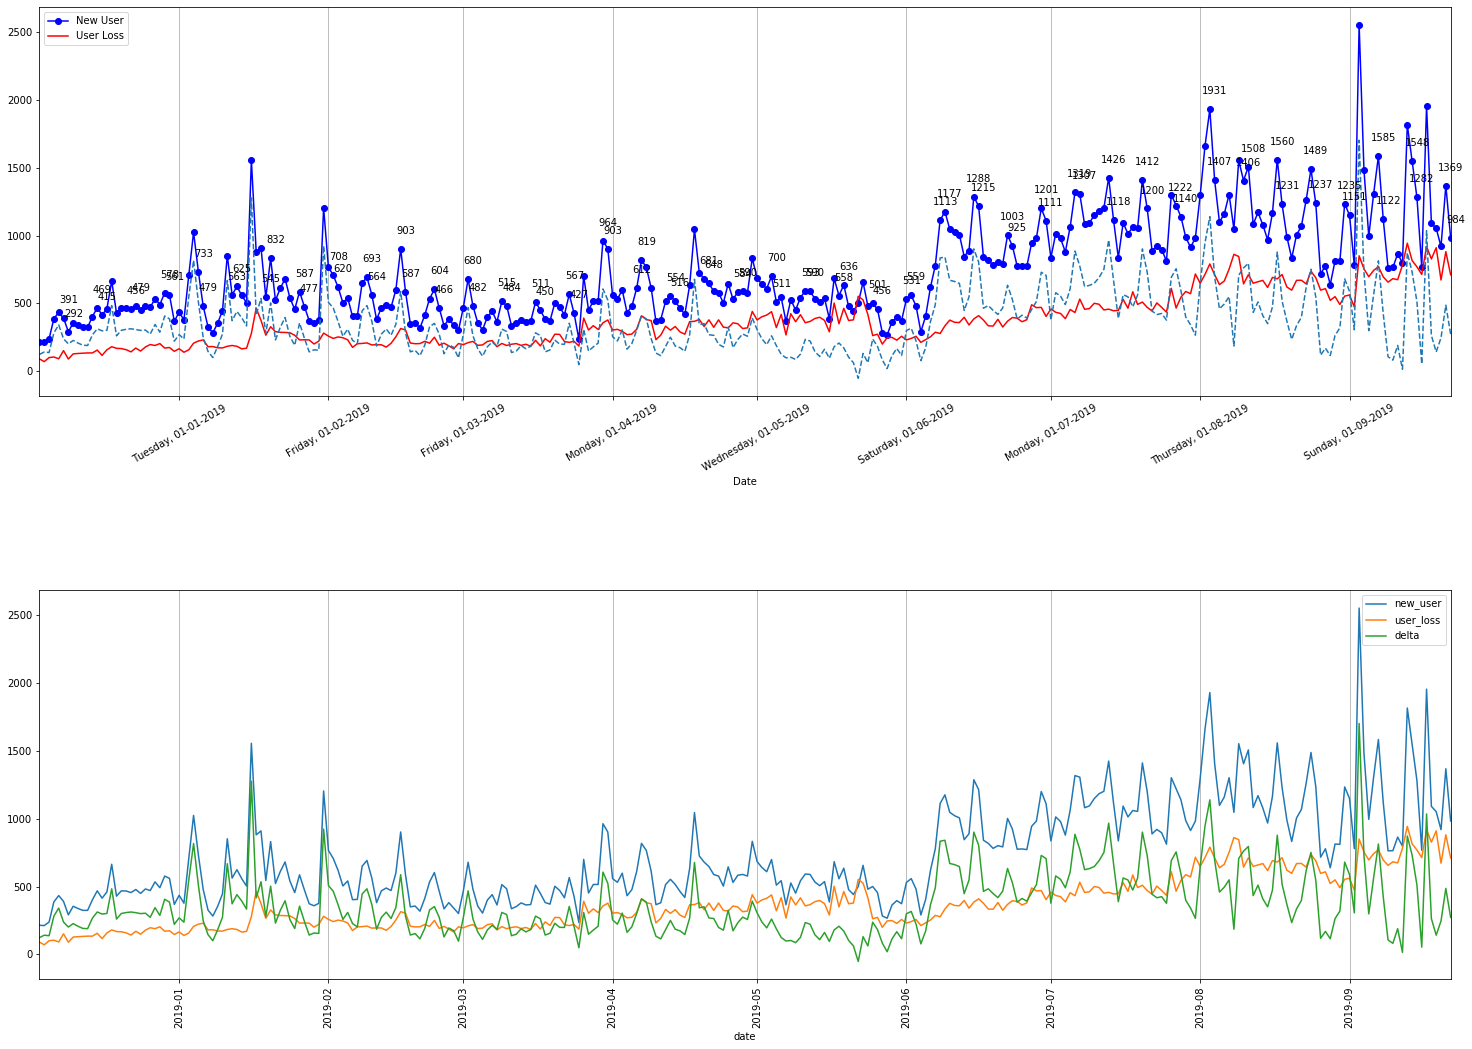

In [217]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates
from matplotlib.dates import (DateFormatter, WeekdayLocator, MonthLocator, DayLocator)

#PREPROCESSING
csvfile = pd.read_csv('nuama.csv', header=1)
csvfile = csvfile[2:]
csvfile.columns = ['period', 'date', 'metric', 'new_user', 'user_loss', 'notes']
csvfile = csvfile[['date', 'new_user', 'user_loss']]
csvfile = csvfile.drop_duplicates(subset='date', keep='last')
csvfile['new_user'] = csvfile['new_user'].str.replace(',', '', regex=False)
csvfile['user_loss'] = csvfile['user_loss'].str.replace(',', '', regex=False)
csvfile['user_loss'] = csvfile['user_loss'].astype(int)
csvfile['new_user'] = csvfile['new_user'].astype(int)
csvfile = csvfile.sort_values(by='date', ascending=True)
csvfile['date'] = pd.to_datetime(csvfile['date'])
csvfile['date'] = csvfile['date'].dt.date
csvfile.set_index('date', inplace=True)
csvfile['delta'] = csvfile['new_user'] - csvfile['user_loss']
idx = csvfile.index
dateseries = pd.to_datetime(csvfile.index).to_series()
day = dateseries.dt.weekday
# csvfile.reset_index(drop=True, inplace=True) #this is how to reset index

#CREATING FIGURE
fig, ax = plt.subplots(2, 1, figsize=(20,15))
fig.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=0.5)

#PLOTTING USING MATPLOTLIB
ax[0].plot(idx, csvfile['new_user'], ls='-', marker='o', color='b', label='New User')
ax[0].plot(idx, csvfile['user_loss'], ls='-', color='r', label='User Loss')
ax[0].plot(idx, csvfile['delta'], ls='--')
ax[0].tick_params(axis='x', rotation=30)
ax[0].xaxis.set_major_locator(dates.MonthLocator())
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%A, %d-%m-%Y'))
ax[0].set_xlabel('Date')
ax[0].grid(axis='x')
ax[0].legend(loc=2)
ax[0].margins(x=0) #remove blank space for in the left and the right (x axis)
for x, y,  in zip(csvfile.index, csvfile['new_user']):
    if (day[x] == 5 or day[x] == 6):
        ax[0].annotate(y, (dates.date2num(x),y), xytext=(5,15), textcoords='offset points', ha='center') # Annotate
    
#PLOTTING USING PANDAS
# csvfile.plot(x='date', figsize=(20,10), rot=45).grid(color='r', axis='x', linestyle='--') #this is how to plot
csvfile.plot(ax=ax[1], rot=90).grid(axis='x')

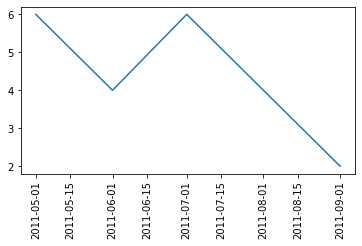

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

date_time = ["2011-09-01", "2011-08-01", "2011-07-01", "2011-06-01", "2011-05-01"]
date_time = pd.to_datetime(date_time)
temp = [2, 4, 6, 4, 6]

DF = pd.DataFrame()
DF['temp'] = temp
DF = DF.set_index(date_time)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF)

In [212]:
x = pd.to_datetime(csvfile.index).to_series()
x.dt.weekday['2018-12-06']

3